In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
import pandas as pd
import numpy as np
from tensorflow import keras

# 1. Descargar el dataset
dataset_path = keras.utils.get_file(
    "auto-mpg.data",
    "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
)
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin', 'Car Name']

raw_dataset = pd.read_csv(
    dataset_path, 
    names=column_names, 
    na_values='?', 
    comment='\t', 
    sep=' ', 
    skipinitialspace=True
)

print("Forma de raw_dataset:", raw_dataset.shape)
print(raw_dataset.head())

# 2. Limpiar o rellenar valores faltantes
# Opción A: Eliminar filas con NaN
# dataset = raw_dataset.dropna()
# print("Forma de dataset después de dropna():", dataset.shape)

# Opción B: Rellenar valores faltantes en 'Horsepower'
dataset = raw_dataset.copy()
dataset['Horsepower'] = pd.to_numeric(dataset['Horsepower'], errors='coerce')
dataset['Horsepower'].fillna(dataset['Horsepower'].median(), inplace=True)
print("Forma de dataset después de fillna():", dataset.shape)

# Eliminar la columna 'Car Name'
dataset = dataset.drop('Car Name', axis=1)

# Convertir 'Origin' en variables dummy
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1) * 1.0
dataset['Europe'] = (origin == 2) * 1.0
dataset['Japan'] = (origin == 3) * 1.0

print("Dataset final:")
print(dataset.head())
print("Forma final:", dataset.shape)

# 3. Separar etiquetas y dividir en train y test
from sklearn.model_selection import train_test_split

train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=0)
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')
print("Forma de train_dataset:", train_dataset.shape)
print("Forma de test_dataset:", test_dataset.shape)


Forma de raw_dataset: (398, 9)
    MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   Model Year  Origin  Car Name  
0          70       1       NaN  
1          70       1       NaN  
2          70       1       NaN  
3          70       1       NaN  
4          70       1       NaN  
Forma de dataset después de fillna(): (398, 9)
Dataset final:
    MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3 

/var/folders/zl/x4wcpc6n7p75fkkmssl2_0vh0000gn/T/ipykernel_25150/630005399.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Horsepower'].fillna(dataset['Horsepower'].median(), inplace=True)



Estadísticas del conjunto de entrenamiento:
              count         mean         std     min      25%     50%  \
Cylinders     318.0     5.452830    1.706170     3.0     4.00     4.0   
Displacement  318.0   191.800314  102.795417    68.0   101.75   148.5   
Horsepower    318.0   103.542453   37.446647    46.0    75.00    93.5   
Weight        318.0  2963.393082  845.227078  1649.0  2216.25  2822.5   
Acceleration  318.0    15.644654    2.701224     8.0    14.00    15.5   
Model Year    318.0    76.147799    3.652083    70.0    73.00    76.0   
USA           318.0     0.613208    0.487783     0.0     0.00     1.0   
Europe        318.0     0.182390    0.386774     0.0     0.00     0.0   
Japan         318.0     0.204403    0.403900     0.0     0.00     0.0   

                  75%     max  
Cylinders        8.00     8.0  
Displacement   262.00   455.0  
Horsepower     125.00   230.0  
Weight        3561.25  5140.0  
Acceleration    17.15    24.8  
Model Year      79.00    82.0  


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 637.1349 - mae: 24.0333 - mse: 637.1349 - val_loss: 545.8245 - val_mae: 22.1636 - val_mse: 545.8245
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 586.4669 - mae: 23.0289 - mse: 586.4669 - val_loss: 480.8768 - val_mae: 20.6860 - val_mse: 480.8768
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 527.3952 - mae: 21.6318 - mse: 527.3952 - val_loss: 420.5374 - val_mae: 19.1976 - val_mse: 420.5374
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 446.0928 - mae: 19.7817 - mse: 446.0928 - val_loss: 362.0969 - val_mae: 17.6280 - val_mse: 362.0969
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 375.9078 - mae: 17.9109 - mse: 375.9078 - val_loss: 302.5594 - val_mae: 15.9629 - val_mse: 302.5594
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 337.0657 - mae: 16.7810 - mse: 337.0657 - val_loss: 242.9649 - val_mae: 14.1911 - val_mse: 242.9649
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - 

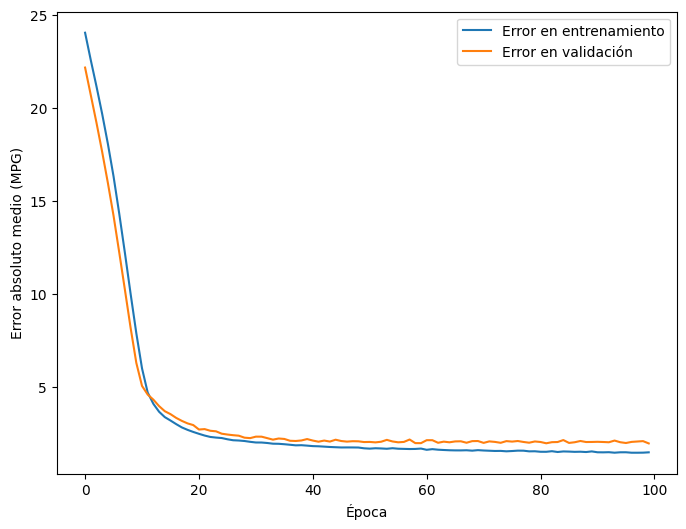

In [6]:


# 4. Normalizar los datos
# Calcular estadísticas del conjunto de entrenamiento
train_stats = train_dataset.describe().transpose()
print("\nEstadísticas del conjunto de entrenamiento:")
print(train_stats)

def norm(x):
    # Normalizamos cada columna: (valor - media) / std
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

# Opcional: Convertir a float32
normed_train_data = normed_train_data.astype('float32')
normed_test_data = normed_test_data.astype('float32')
train_labels = train_labels.astype('float32')
test_labels = test_labels.astype('float32')

print("\nForma de los datos normalizados:")
print(normed_train_data.shape, normed_test_data.shape)

# 5. Construir el modelo de regresión
def build_model():
    model = keras.Sequential([
        layers.Input(shape=(normed_train_data.shape[1],)),  # Número de columnas de entrada
        layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
        layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
        layers.Dense(1)  # Salida lineal para regresión
    ])
    # Usamos Adam con tasa de aprendizaje moderada
    optimizer = keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mse'])
    return model

model = build_model()
model.summary()

# 6. Entrenar el modelo
EPOCHS = 100
history = model.fit(
    normed_train_data,
    train_labels,
    epochs=EPOCHS,
    validation_split=0.2,
    verbose=1
)

# 7. Evaluar el modelo en el conjunto de prueba
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)
print("\nError absoluto medio en test: {:5.2f} MPG".format(mae))

# 8. Visualizar el historial de entrenamiento
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch  # history.epoch es una lista
    plt.figure(figsize=(8,6))
    plt.xlabel('Época')
    plt.ylabel('Error absoluto medio (MPG)')
    plt.plot(hist['epoch'], hist['mae'], label='Error en entrenamiento')
    plt.plot(hist['epoch'], hist['val_mae'], label='Error en validación')
    plt.legend()
    plt.show()

plot_history(history)


In [20]:
normed_train_data.describe()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,3.180000e+02,3.180000e+02,3.180000e+02,3.180000e+02,3.180000e+02,3.180000e+02,3.180000e+02,3.180000e+02,3.180000e+02
mean,-4.498464e-09,7.122567e-09,-7.497439e-10,-2.998976e-09,5.997951e-09,6.747696e-09,-8.996928e-09,8.996928e-09,-1.049642e-08
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01,9.999999e-01,1.000000e+00
min,-1.437623e+00,-1.204337e+00,-1.536652e+00,-1.555077e+00,-2.830070e+00,-1.683368e+00,-1.257132e+00,-4.715670e-01,-5.060722e-01
25%,-8.515154e-01,-8.760149e-01,-7.622165e-01,-8.839554e-01,-6.088551e-01,-8.619188e-01,-1.257132e+00,-4.715670e-01,-5.060722e-01
50%,-8.515154e-01,-4.212281e-01,-2.681803e-01,-1.666926e-01,-5.355131e-02,-4.046971e-02,7.929600e-01,-4.715670e-01,-5.060722e-01
75%,1.492916e+00,6.829067e-01,5.730165e-01,7.073329e-01,5.572829e-01,7.809794e-01,7.929600e-01,-4.715670e-01,-5.060722e-01
max,1.492916e+00,2.560422e+00,3.377006e+00,2.575174e+00,3.389332e+00,1.602428e+00,7.929600e-01,2.113921e+00,1.969789e+00


In [2]:
print("Forma de raw_dataset:", raw_dataset.shape)


Forma de raw_dataset: (398, 9)


In [3]:
dataset = raw_dataset.dropna()
print("Forma de dataset después de dropna():", dataset.shape)


Forma de dataset después de dropna(): (0, 9)


In [4]:
dataset = raw_dataset.copy()
# Rellenar los valores faltantes en Horsepower con la mediana
dataset['Horsepower'] = pd.to_numeric(dataset['Horsepower'], errors='coerce')
dataset['Horsepower'].fillna(dataset['Horsepower'].median(), inplace=True)
print("Forma de dataset después de fillna():", dataset.shape)


Forma de dataset después de fillna(): (398, 9)


/var/folders/zl/x4wcpc6n7p75fkkmssl2_0vh0000gn/T/ipykernel_25150/3836387563.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Horsepower'].fillna(dataset['Horsepower'].median(), inplace=True)


In [8]:
def plot_history(history):
    df_hist = pd.DataFrame(history.history)
    df_hist['epoch'] = history.epoch
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.plot(df_hist['epoch'], df_hist['mae'], label=['Train Error'] )
    plt.plot(df_hist['epoch'], df_hist['val_mae'], label=['Val Error'] )
    plt.legend()
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.plot(df_hist['epoch'], df_hist['mse'], label=['Train Error'] )
    plt.plot(df_hist['epoch'], df_hist['val_mse'], label=['Val Error'] )
    plt.ylim([0,20])
    plt.legend()

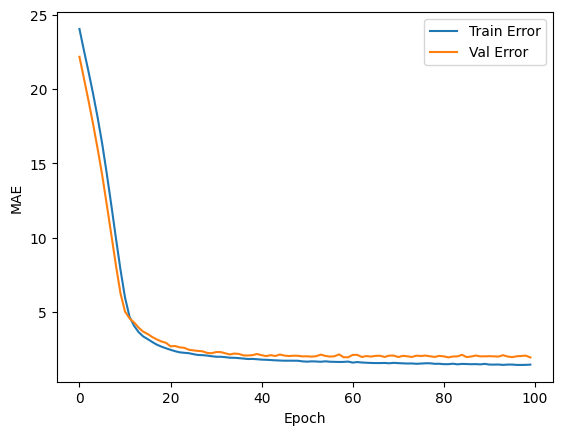

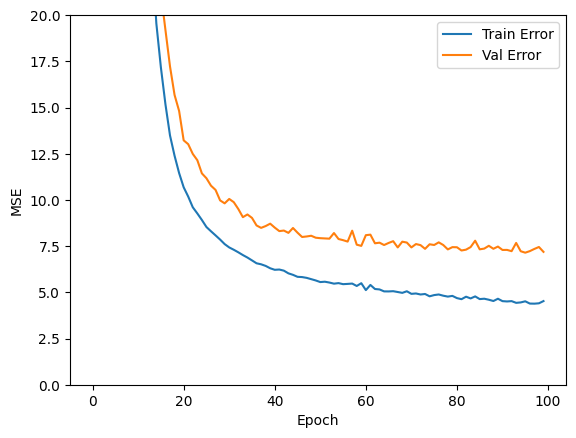

In [9]:
plot_history(history)

In [10]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels)
mae

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 7.9105 - mae: 1.9939 - mse: 7.9105


1.9774692058563232

In [11]:
model.save("my_keras_model_MAE_1_96.h5")

Ahora prueba el modelo. Coge 10 ejemplos de train y llama a` model.predict`.

In [12]:
result_10 = model.predict(normed_train_data[:10])
result_10

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


array([[14.116454],
       [27.242271],
       [32.672634],
       [28.18127 ],
       [32.455704],
       [34.60408 ],
       [28.770952],
       [19.408186],
       [28.508911],
       [35.944283]], dtype=float32)

### Haz Predicciones

Dibuja en un scatter plot las predicciones de test vs sus true labels.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


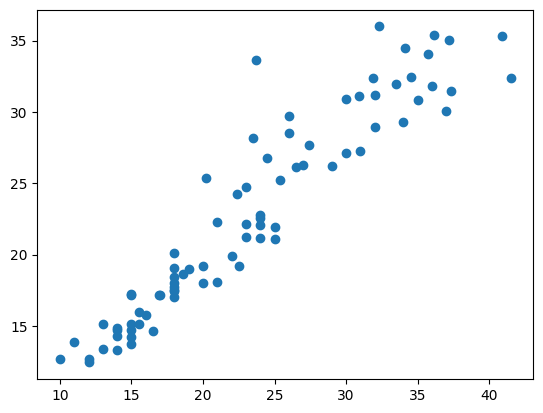

In [13]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)

Parece que nuestro modelo predice razonablemente bien. Echemos un vistazo a la distribución de errores.

Representa los residuos en un histograma

(array([ 1.,  3.,  5., 16., 29., 18.,  5.,  2.,  0.,  1.]),
 array([-9.15641022, -7.24718904, -5.33796787, -3.42874646, -1.51952517,
         0.38969612,  2.29891729,  4.20813847,  6.11736012,  8.02658081,
         9.93580246]),
 <BarContainer object of 10 artists>)

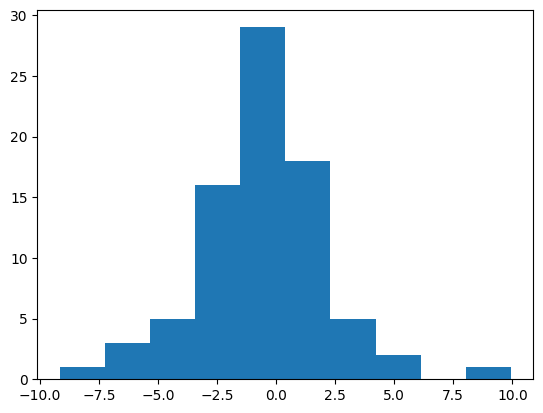

In [14]:
error = test_predictions - test_labels

plt.hist(error)

No es del todo gaussiano, pero podríamos esperar eso porque el número de muestras es muy pequeño.

## Conclusion

Este cuaderno introdujo algunas técnicas para manejar un problema de regresión.

* El error cuadrático medio (MSE) es una función de pérdida común utilizada para problemas de regresión (se utilizan diferentes funciones de pérdida para problemas de clasificación).
* Del mismo modo, las métricas de evaluación utilizadas para la regresión difieren de la clasificación. Una métrica de regresión común es el error absoluto medio (MAE).
* Cuando las características de datos de entrada numéricos tienen valores con diferentes rangos, cada característica debe escalarse independientemente al mismo rango.
* Si no hay muchos datos de entrenamiento, una técnica es preferir una red pequeña con pocas capas ocultas para evitar el sobreajuste.
* La detención temprana es una técnica útil para evitar el sobreajuste.

In [18]:

from keras.losses import MeanSquaredError
model_loaded = keras.models.load_model(
    "my_keras_model_MAE_1_96.h5",
    custom_objects={'mse': MeanSquaredError, 'MeanSquaredError': MeanSquaredError}
)


test_predictions = model_loaded.predict(normed_test_data).flatten()

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/stepWARNING:tensorflow:6 out of the last 10 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x16578d9e0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


In [19]:
test_predictions

array([13.332514, 21.940355, 15.099745, 18.099276, 17.745966, 30.800045,
       34.489735, 19.174797, 15.106405, 28.14183 , 35.332283, 35.05875 ,
       18.398048, 24.714489, 16.000574, 34.08114 , 27.225315, 26.246326,
       17.545343, 31.447447, 15.145612, 21.232979, 22.554482, 20.137117,
       32.42594 , 25.239117, 35.36636 , 29.322037, 30.868347, 15.748024,
       18.650898, 30.039865, 17.192913, 31.959848, 24.228231, 21.185081,
       18.99929 , 17.17397 , 32.358154, 12.434256, 14.258338, 14.202326,
       27.660465, 33.635803, 31.180508, 22.08342 , 19.181349, 14.646969,
       22.2589  , 28.540512, 32.34359 , 26.171736, 17.251085, 27.103159,
       14.734329, 12.651486, 17.470472, 25.360826, 31.781635, 17.190111,
       17.018028, 26.156906, 19.035208, 19.904863, 12.644432, 14.691218,
       13.751841, 17.977898, 22.124214, 14.865409, 35.98534 , 13.369588,
       21.09282 , 18.00076 , 22.779041, 31.118088, 29.710331, 28.925148,
       26.770264, 13.884618], dtype=float32)